In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.regression.linear_model import OLS
from statsmodels.api import add_constant
from statsmodels.tsa.api import VAR

In [2]:
pip install arch

   ---------------------------------------- 0.0/924.9 kB ? eta -:--:--
   -- ------------------------------------- 61.4/924.9 kB 1.7 MB/s eta 0:00:01
   --------------------------------------  921.6/924.9 kB 11.7 MB/s eta 0:00:01
   --------------------------------------- 924.9/924.9 kB 11.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
from arch.unitroot import DFGLS, ADF, KPSS, PhillipsPerron
from statsmodels.tsa.vector_ar import vecm
from statsmodels.tsa.stattools import arma_order_select_ic

In [5]:
import requests
import datetime

In [23]:
# Get TVL data for Solana
def get_tvl_data(protocol='solana'):
    url = f'https://api.llama.fi/charts/{protocol}'
    response = requests.get(url)
    data = response.json()
    df = pd.DataFrame(data)
    df['date'] = pd.to_datetime(df['date'], unit='s')
    df.set_index('date', inplace=True)
    df.rename(columns={'totalLiquidityUSD': 'TVL'}, inplace=True)
    return df

tvl_df = get_tvl_data('solana')

print(tvl_df.head())

                     TVL
date                    
2021-03-18  1.489888e+08
2021-03-19  1.532043e+08
2021-03-20  1.476909e+08
2021-03-21  1.519353e+08
2021-03-22  1.529811e+08


C:\Users\HHGiang\AppData\Local\Temp\ipykernel_43860\4047026464.py:7: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['date'] = pd.to_datetime(df['date'], unit='s')


In [150]:
import glob

In [151]:
import os

In [164]:
# Define the common path to your local directory
file_path = 'C:/Users/HHGiang/Documents/KEIO/4FZ/4F summer camp/TokenTerminal/TokenTerminal_*.csv'

# Get a list of all CSV files in the directory matching the pattern
csv_files = glob.glob(file_path)

# Check if any files are found
if len(csv_files) == 0:
    print("No CSV files found. Please check the file path or pattern.")
else:
    print(f"Found {len(csv_files)} files.")

Found 11 files.


In [165]:
# Initialize an empty list to hold dataframes
dfs = []

# Loop through the files and read them into dataframes
for file in csv_files:
    try:
        df = pd.read_csv(file)
        
        # Check if there's a 'Date' column and convert it to datetime format
        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Handle any incorrect date formats
            dfs.append(df)
            print(f"Loaded and processed file: {os.path.basename(file)} with shape {df.shape}")
        else:
            print(f"'Date' column not found in file: {os.path.basename(file)}")
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Ensure there are dataframes to merge
if len(dfs) > 0:
    # Merge all dataframes on the 'Date' column (ensure 'Date' column exists in your files)
    merged_df = dfs[0]
    for df in dfs[1:]:
        merged_df = pd.merge(merged_df, df, on='Date', how='outer')

    # Drop rows with any NaN values (optional, you can use another strategy like filling missing values)
    merged_df_clean = merged_df.dropna()

    # Display the merged dataframe (you can print a sample)
    print(merged_df_clean.head())  # Print the first few rows of the cleaned data

    # Optionally, save the cleaned merged dataframe to a new CSV file
    merged_df_clean.to_csv('C:/Users/HHGiang/Documents/KEIO/4FZ/4F summer camp/TokenTerminal/Merged_Data_Clean.csv', index=False)
    print("Cleaned merged data saved to 'Merged_Data_Clean.csv'")
else:
    print("No valid dataframes to merge.")

Loaded and processed file: TokenTerminal_Active users (daily) for Solana since launch 2024-09-26.csv with shape (1389, 2)
Loaded and processed file: TokenTerminal_Code commits for Solana since launch 2024-09-26.csv with shape (2479, 2)
Loaded and processed file: TokenTerminal_Core developers for Solana since launch 2024-09-26.csv with shape (2479, 2)
Loaded and processed file: TokenTerminal_Earnings for Solana since launch 2024-09-26.csv with shape (1389, 2)
Loaded and processed file: TokenTerminal_Fees for Solana since launch 2024-09-26.csv with shape (1389, 2)
Loaded and processed file: TokenTerminal_Market cap (circulating) for Solana since launch 2024-09-26.csv with shape (1628, 2)
Loaded and processed file: TokenTerminal_PF ratio (circulating) for Solana since launch 2024-09-26.csv with shape (1389, 2)
Loaded and processed file: TokenTerminal_Price for Solana since launch 2024-09-26.csv with shape (1628, 2)
Loaded and processed file: TokenTerminal_Sol trading volume for Solana sin

In [166]:
merged_df_clean.reset_index(drop=True, inplace=True)

merged_df_clean.head()

,Date,Active users (daily) (#),Code commits (#),Core developers (#),Earnings ($),Fees ($),Market cap (circulating) ($),P/F ratio (circulating) (x),Price ($),Token trading volume ($),Token turnover (circulating) (%),Transaction count (#)
0,2020-12-06,1006.0,10,29,404.31,808.61,91469353.59,309.92,1.98,10627298.67,0.12,81222839.0
1,2020-12-07,725.0,39,30,378.11,756.21,85608059.74,299.77,1.85,10598081.57,0.12,82108323.0
2,2020-12-08,599.0,27,31,295.60,591.20,84695936.98,322.88,1.83,10468359.69,0.12,64508537.0
3,2020-12-09,551.0,21,31,251.39,502.79,77643530.78,320.03,1.67,17112369.53,0.22,59891419.0
4,2020-12-10,519.0,24,31,259.34,518.67,77258533.72,333.07,1.66,16742998.45,0.22,62344387.0


In [167]:
# Ensure the 'Date' column is in datetime format
merged_df_clean['Date'] = pd.to_datetime(merged_df_clean['Date'])

# Merge the TVL data into the existing DataFrame based on the 'Date' column
# Here we reset the index of the TVL data to make sure it's ready for merging on 'Date'
tvl_df_reset = tvl_df.reset_index().rename(columns={'date': 'Date'})

# Merge the TVL data using an outer join to avoid dropping any date from either DataFrame
merged_with_tvl = pd.merge(merged_df_clean, tvl_df_reset, on='Date', how='outer')

# Drop rows with any missing values (NaN)
merged_with_tvl_clean = merged_with_tvl.dropna()

# Reset the index after dropping NaN rows
merged_with_tvl_clean.reset_index(drop=True, inplace=True)

# Display the first few rows of the cleaned and merged DataFrame
print(merged_with_tvl_clean.head())

        Date  Active users (daily) (#)  Code commits (#)  Core developers (#)  \
0 2021-03-18                   18773.0              50.0                 44.0   
1 2021-03-19                    6078.0              65.0                 44.0   
2 2021-03-20                    5856.0              18.0                 42.0   
3 2021-03-21                    5647.0               3.0                 39.0   
4 2021-03-22                    6769.0              36.0                 38.0   

   Earnings ($)  Fees ($)  Market cap (circulating) ($)  \
0       2779.14   5558.28                  3.813907e+09   
1       2826.04   5652.07                  3.818503e+09   
2   -3013605.56   5481.05                  3.784531e+09   
3       2638.64   5277.28                  3.827195e+09   
4       2738.88   5477.75                  3.820744e+09   

   P/F ratio (circulating) (x)  Price ($)  Token trading volume ($)  \
0                      1906.17      14.28              1.181280e+08   
1               

C:\Users\HHGiang\AppData\Local\Temp\ipykernel_43860\3481798398.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_clean['Date'] = pd.to_datetime(merged_df_clean['Date'])


In [168]:
alldata = merged_with_tvl_clean
alldata.to_csv('C:/Users/HHGiang/Documents/KEIO/4FZ/4F summer camp/alldata.csv', index=False)

In [169]:
alldata.set_index("Date", inplace=True)

In [170]:
alldata.describe()

,Active users (daily) (#),Code commits (#),Core developers (#),Earnings ($),Fees ($),Market cap (circulating) ($),P/F ratio (circulating) (x),Price ($),Token trading volume ($),Token turnover (circulating) (%),Transaction count (#),TVL
count,1.287000e+03,1287.000000,1287.000000,1.287000e+03,1.287000e+03,1.287000e+03,1287.000000,1287.000000,1.287000e+03,1287.000000,1.287000e+03,1.287000e+03
mean,3.453730e+05,39.463869,88.335664,-5.515550e+06,3.330974e+05,2.876389e+10,753.304336,76.475128,1.792820e+09,0.071958,2.592199e+08,4.116671e+09
std,5.303285e+05,28.149071,20.952011,9.933707e+06,6.315817e+05,2.429889e+10,613.377032,61.120865,1.777500e+09,0.056192,9.386601e+07,3.954810e+09
min,5.018000e+03,0.000000,36.000000,-5.104592e+07,4.955140e+03,3.458197e+09,61.160000,9.600000,7.948416e+07,0.010000,5.937673e+07,1.356105e+08
25%,1.040545e+05,18.000000,76.000000,-6.304321e+06,3.904575e+04,8.849902e+09,462.425000,24.210000,5.511212e+08,0.040000,2.112478e+08,6.158980e+08
50%,1.677670e+05,36.000000,85.000000,1.319621e+04,5.665168e+04,1.411565e+10,609.080000,42.870000,1.300493e+09,0.060000,2.594009e+08,2.407110e+09
75%,3.391880e+05,57.000000,101.000000,4.825749e+04,2.353200e+05,4.721085e+10,795.660000,133.405000,2.490011e+09,0.090000,3.401579e+08,7.633046e+09
max,5.074795e+06,222.000000,160.000000,2.472987e+06,5.085678e+06,9.010785e+10,3242.550000,259.240000,1.696893e+10,0.850000,4.467050e+08,1.485216e+10


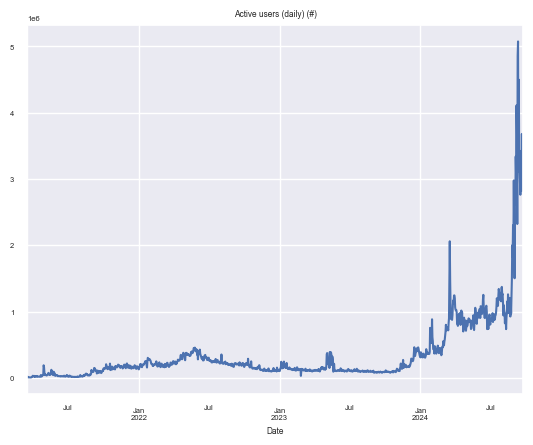

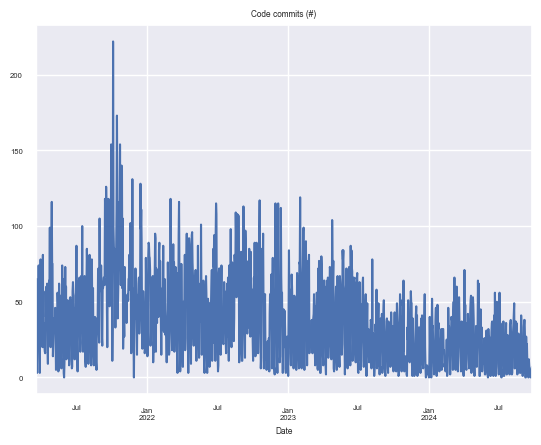

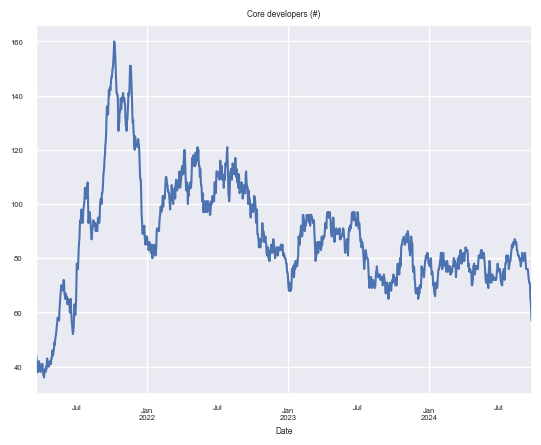

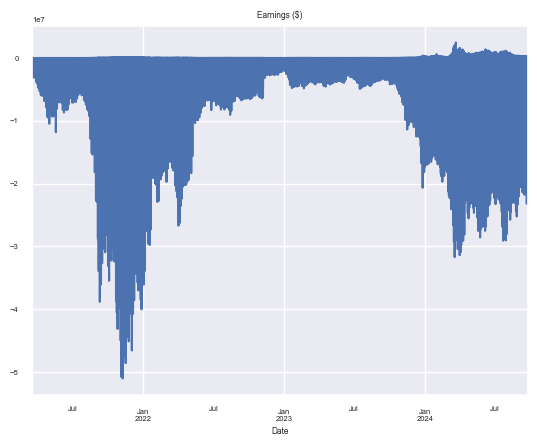

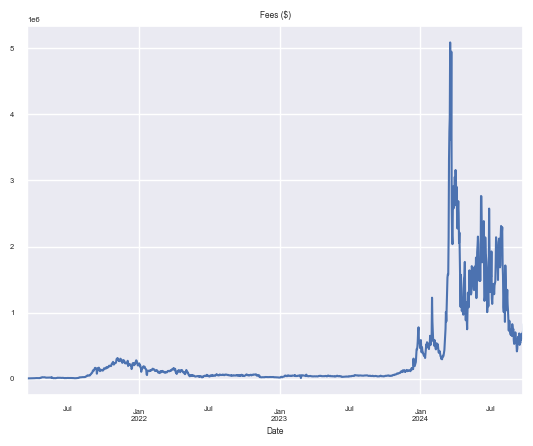

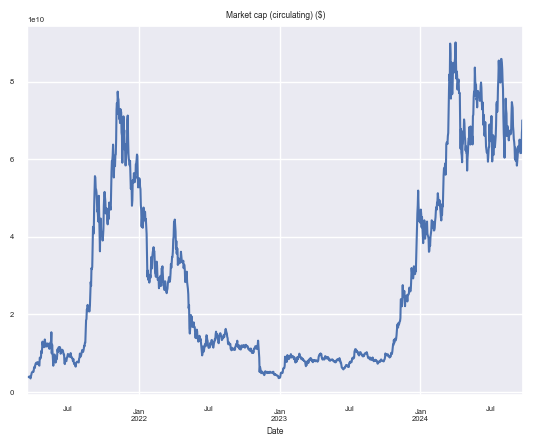

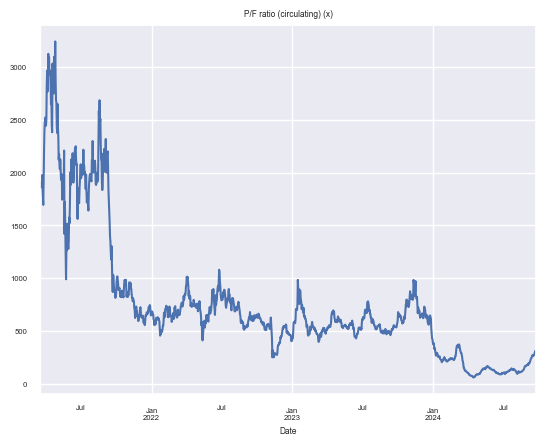

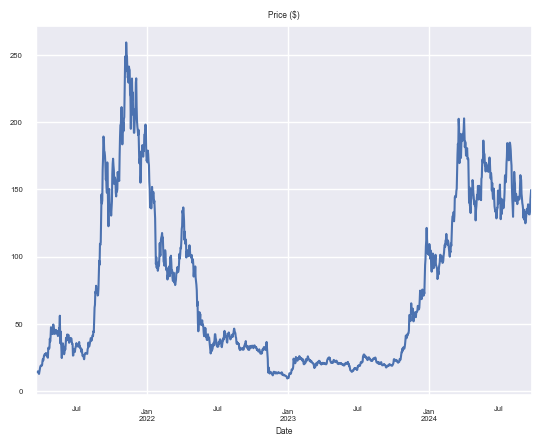

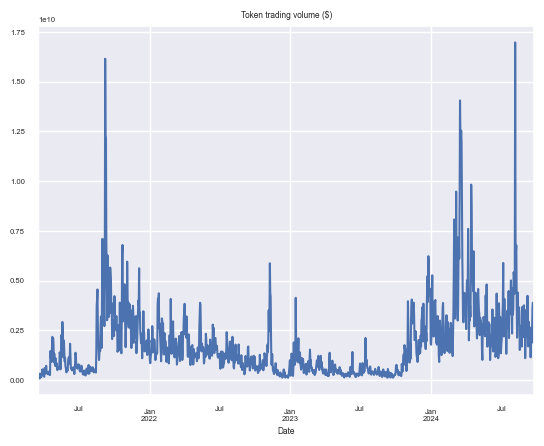

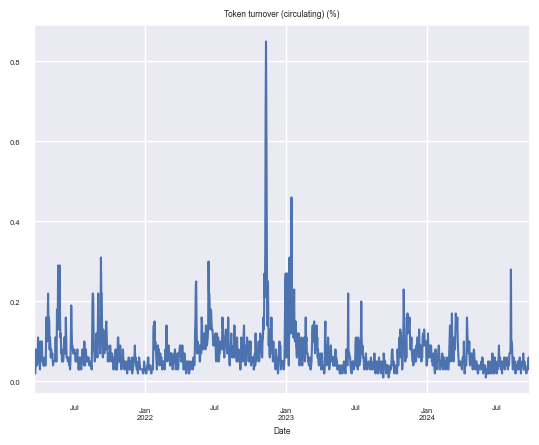

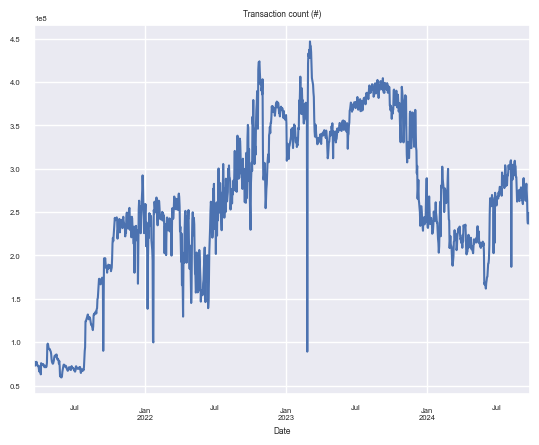

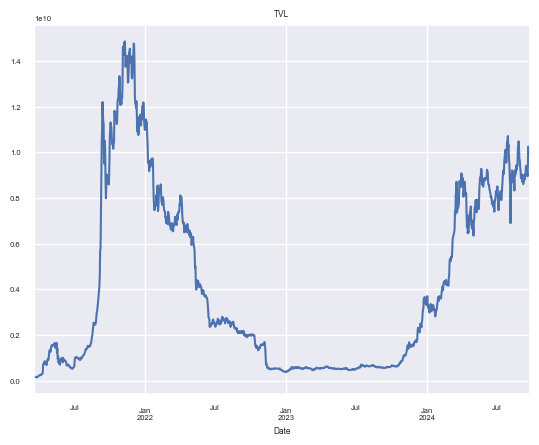

In [171]:
for col in alldata.columns:
    alldata[col].plot()
    plt.title(col)
    plt.show()

In [172]:
others = [col for col in alldata.columns if col not in ["Price ($)"]]
others_pct = pd.concat([alldata[others].pct_change(), alldata["Price ($)"].pct_change()], axis=1).dropna(how="any")
others_pct.columns = ["pct_"+col for col in others_pct.columns[:-1]]+["Return"]

In [173]:
others_pct.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1284 entries, 2021-03-19 to 2024-09-24
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   pct_Active users (daily) (#)          1284 non-null   float64
 1   pct_Code commits (#)                  1284 non-null   float64
 2   pct_Core developers (#)               1284 non-null   float64
 3   pct_Earnings ($)                      1284 non-null   float64
 4   pct_Fees ($)                          1284 non-null   float64
 5   pct_Market cap (circulating) ($)      1284 non-null   float64
 6   pct_P/F ratio (circulating) (x)       1284 non-null   float64
 7   pct_Token trading volume ($)          1284 non-null   float64
 8   pct_Token turnover (circulating) (%)  1284 non-null   float64
 9   pct_Transaction count (#)             1284 non-null   float64
 10  pct_TVL                               1284 non-null   float64
 11 

In [174]:
others_pct

,pct_Active users (daily) (#),pct_Code commits (#),pct_Core developers (#),pct_Earnings ($),pct_Fees ($),pct_Market cap (circulating) ($),pct_P/F ratio (circulating) (x),pct_Token trading volume ($),pct_Token turnover (circulating) (%),pct_Transaction count (#),pct_TVL,Return
Date,,,,,,,,,,,,
2021-03-19,-0.676237,0.300000,0.000000,0.016876,0.016874,0.001205,-0.007738,-0.167539,0.000000,0.011649,0.028294,-0.000700
2021-03-20,-0.036525,-0.723077,-0.045455,-1067.370455,-0.030258,-0.008897,-0.016067,-0.116889,-0.333333,-0.022909,-0.035987,-0.006307
2021-03-21,-0.035690,-0.833333,-0.071429,-1.000876,-0.037177,0.011273,0.009656,-0.005748,0.000000,-0.043688,0.028738,0.007052
2021-03-22,0.198690,11.000000,-0.025641,0.037989,0.037987,-0.001686,0.005673,-0.079441,0.000000,0.033378,0.006883,0.002101
2021-03-23,0.082730,-0.361111,0.000000,-1154.118640,0.041386,0.046101,0.045902,3.108898,3.000000,0.015924,0.059382,0.039133
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-19,-0.071596,-0.333333,-0.014085,-72.712138,0.153526,0.013072,0.014705,0.281213,0.333333,-0.015067,0.061440,0.015891
2024-09-20,0.302097,-0.500000,-0.071429,-1.014797,-0.080095,0.070590,0.074596,0.293656,0.250000,0.030179,0.078634,0.067959
2024-09-21,-0.217071,-1.000000,-0.015385,-75.254021,-0.021619,0.027392,0.030343,0.089302,0.200000,0.008491,-0.020515,0.026561


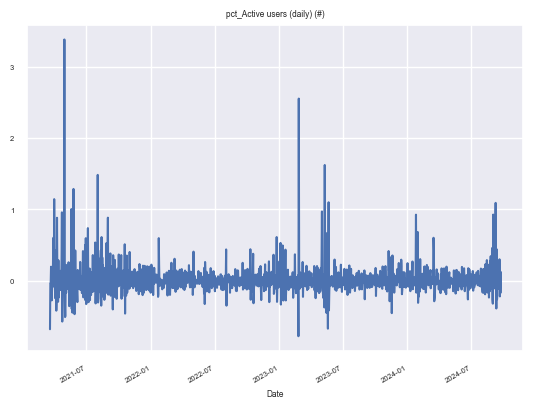

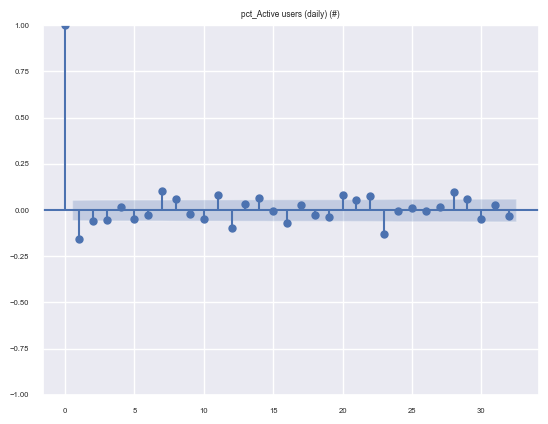

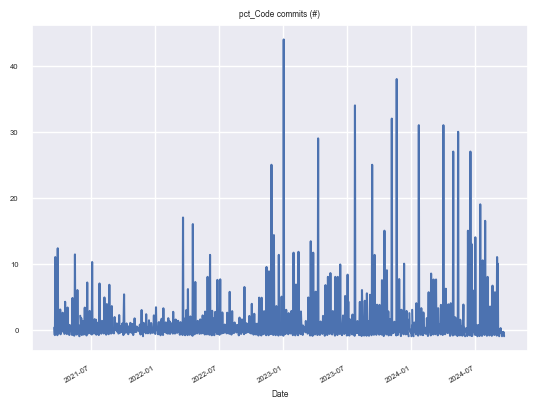

C:\Users\HHGiang\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:470: RuntimeWarning: invalid value encountered in subtract
  xo = x - x.mean()


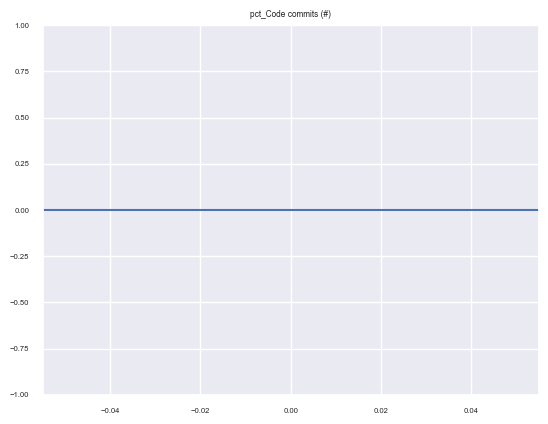

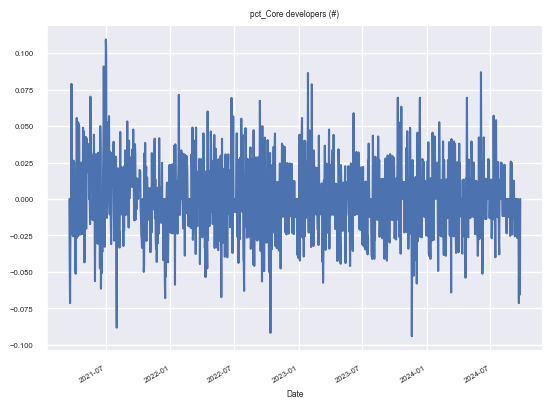

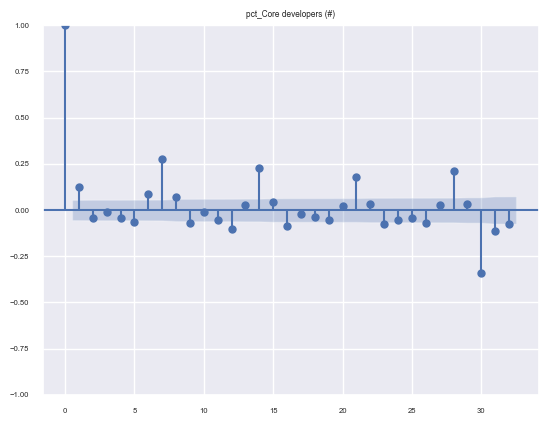

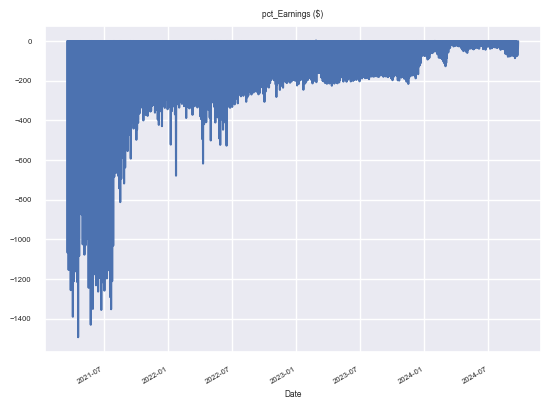

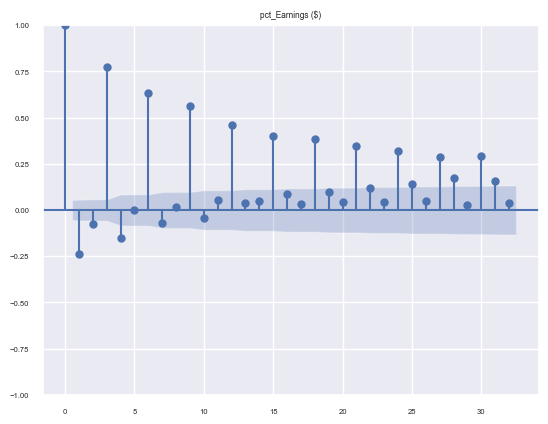

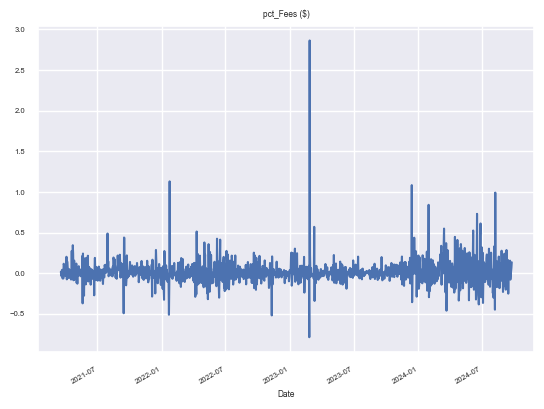

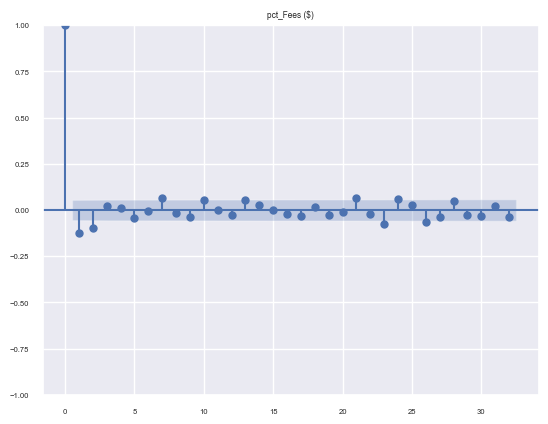

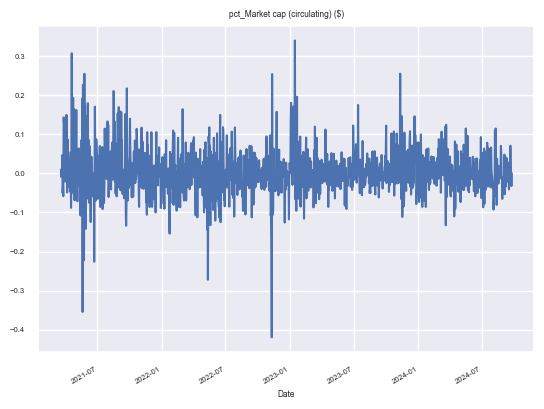

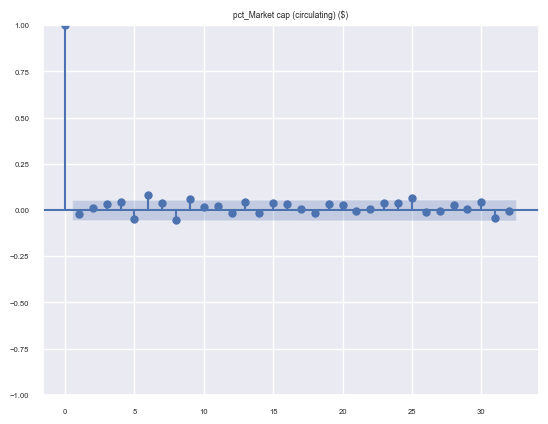

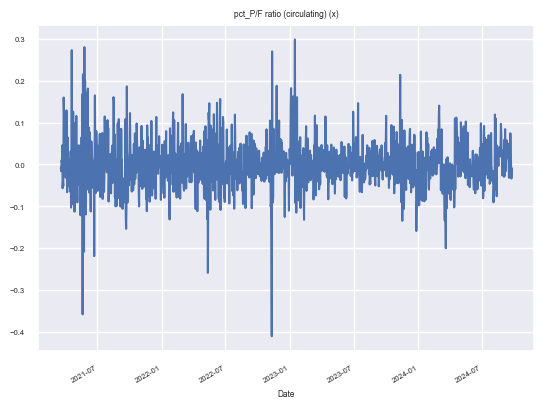

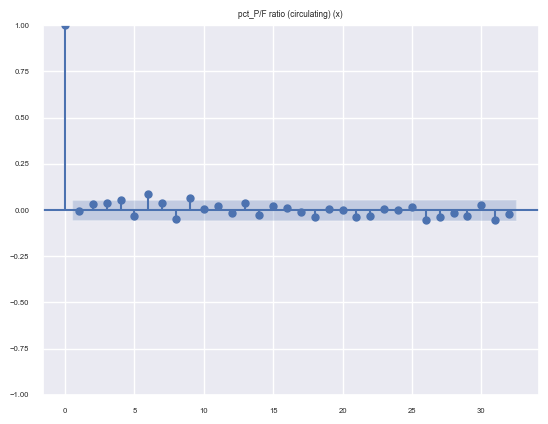

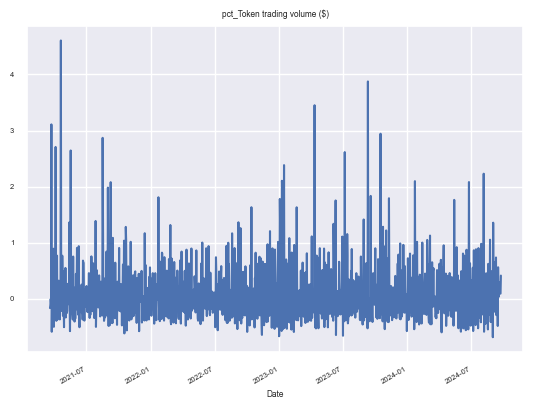

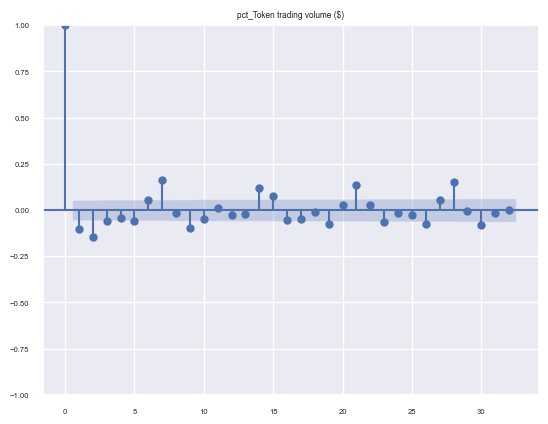

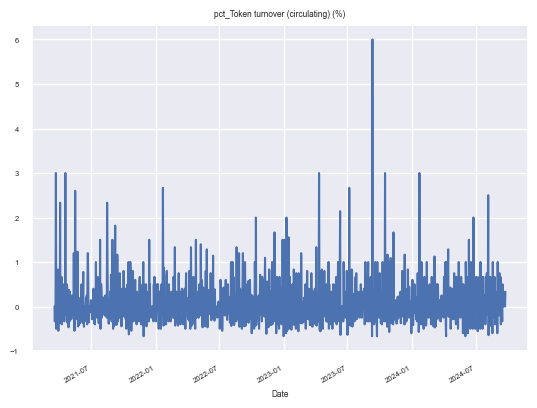

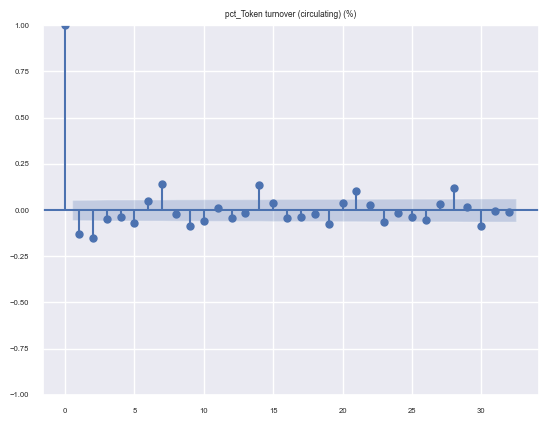

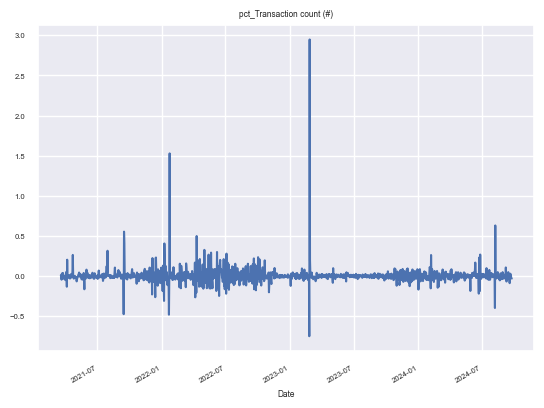

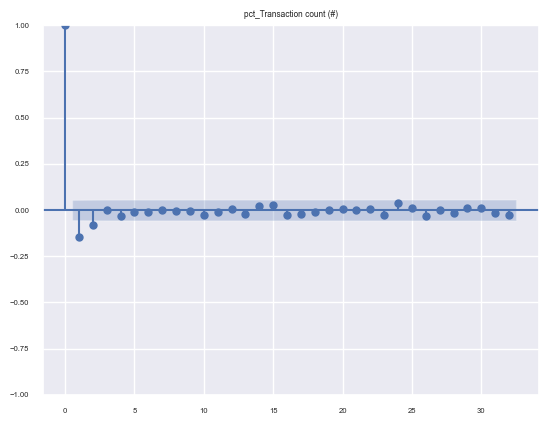

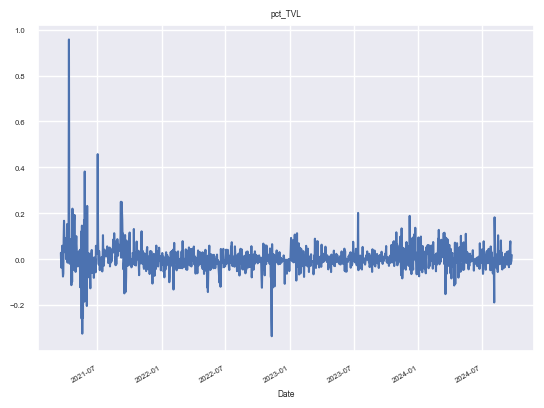

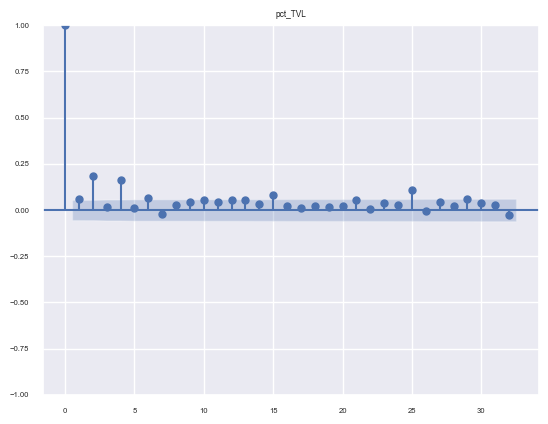

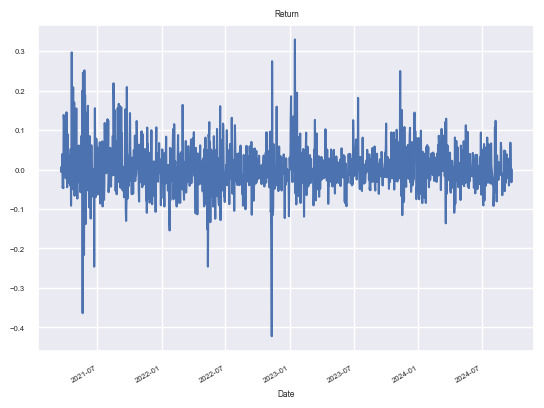

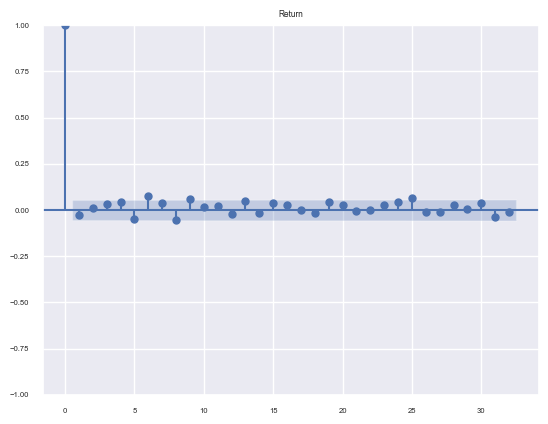

In [175]:
for col in others_pct.columns:
    others_pct[col].plot()
    plt.title(col)
    plt.show()
    plot_acf(others_pct[col])
    plt.title(col)
    plt.show()

In [190]:
# List of columns to delete
columns_to_delete = ['pct_Code commits (#)', 'pct_Expenses ($)', 'pct_Token incentives ($)', 'pct_Transaction count (#)']

# Dropping the columns from the dataframe
new_dataframe = alldatawpct.drop(columns=columns_to_delete)

# Display the first few rows of the new dataframe to ensure the columns were deleted
new_dataframe.head()

,Active users (daily) (#),Code commits (#),Core developers (#),Earnings ($),Expenses ($),Fees ($),Market cap (circulating) ($),P/F ratio (circulating) (x),Price ($),P/S ratio (circulating) (x),...,pct_Market cap (circulating) ($),pct_P/F ratio (circulating) (x),pct_P/S ratio (circulating) (x),pct_Revenue ($),pct_Token trading volume ($),pct_Supply-side fees ($),pct_Token turnover (circulating) (%),pct_Transactions per second (#),pct_TVL,Return
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-20,5856.0,18.0,42.0,-3013605.56,3016346.09,5481.05,3.784531e+09,1861.03,14.18,3722.06,...,-0.008897,-0.016067,-0.016070,-0.030261,-0.116889,-0.030261,-0.333333,-0.022913,-0.035987,-0.006307
2021-03-21,5647.0,3.0,39.0,2638.64,0.00,5277.28,3.827195e+09,1879.00,14.28,3758.01,...,0.011273,0.009656,0.009659,-0.037175,-0.005748,-0.037175,0.000000,-0.043692,0.028738,0.007052
2021-03-23,7329.0,23.0,38.0,-3158253.58,3161105.81,5704.45,3.996884e+09,1976.40,14.87,3952.80,...,0.046101,0.045902,0.045902,0.041382,3.108898,0.041382,3.000000,0.015927,0.059382,0.039133
2021-03-24,5334.0,38.0,38.0,2666.46,0.00,5332.92,3.797038e+09,1864.19,14.19,3728.38,...,-0.050000,-0.056775,-0.056775,-0.065128,-0.590048,-0.065128,-0.500000,-0.026408,-0.036801,-0.045730
2021-03-26,5146.0,35.0,42.0,-2752230.71,2754708.28,4955.14,3.458197e+09,1695.14,12.96,3390.27,...,-0.058510,-0.051054,-0.051060,-0.065392,-0.027462,-0.065392,0.000000,-0.032163,-0.061126,-0.047059


In [191]:
new_dataframe = pd.concat([alldata, others_pct], axis=1).dropna()
new_dataframe

,Active users (daily) (#),Code commits (#),Core developers (#),Earnings ($),Fees ($),Market cap (circulating) ($),P/F ratio (circulating) (x),Price ($),Token trading volume ($),Token turnover (circulating) (%),...,pct_Core developers (#),pct_Earnings ($),pct_Fees ($),pct_Market cap (circulating) ($),pct_P/F ratio (circulating) (x),pct_Token trading volume ($),pct_Token turnover (circulating) (%),pct_Transaction count (#),pct_TVL,Return
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-19,6078.0,65.0,44.0,2826.04,5652.07,3.818503e+09,1891.42,14.27,9.833702e+07,0.03,...,0.000000,0.016876,0.016874,0.001205,-0.007738,-0.167539,0.000000,0.011649,0.028294,-0.000700
2021-03-20,5856.0,18.0,42.0,-3013605.56,5481.05,3.784531e+09,1861.03,14.18,8.684253e+07,0.02,...,-0.045455,-1067.370455,-0.030258,-0.008897,-0.016067,-0.116889,-0.333333,-0.022909,-0.035987,-0.006307
2021-03-21,5647.0,3.0,39.0,2638.64,5277.28,3.827195e+09,1879.00,14.28,8.634340e+07,0.02,...,-0.071429,-1.000876,-0.037177,0.011273,0.009656,-0.005748,0.000000,-0.043688,0.028738,0.007052
2021-03-22,6769.0,36.0,38.0,2738.88,5477.75,3.820744e+09,1889.66,14.31,7.948416e+07,0.02,...,-0.025641,0.037989,0.037987,-0.001686,0.005673,-0.079441,0.000000,0.033378,0.006883,0.002101
2021-03-23,7329.0,23.0,38.0,-3158253.58,5704.45,3.996884e+09,1976.40,14.87,3.265923e+08,0.08,...,0.000000,-1154.118640,0.041386,0.046101,0.045902,3.108898,3.000000,0.015924,0.059382,0.039133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-19,2825373.0,2.0,70.0,-21130938.22,679803.87,6.240327e+10,276.02,133.61,2.755310e+09,0.04,...,-0.014085,-72.712138,0.153526,0.013072,0.014705,0.281213,0.333333,-0.015067,0.061440,0.015891
2024-09-20,3678910.0,1.0,65.0,312677.50,625354.99,6.680835e+10,296.61,142.69,3.564422e+09,0.05,...,-0.071429,-1.014797,-0.080095,0.070590,0.074596,0.293656,0.250000,0.030179,0.078634,0.067959
2024-09-21,2880325.0,0.0,64.0,-23217561.64,611835.44,6.863837e+10,305.61,146.48,3.882734e+09,0.06,...,-0.015385,-75.254021,-0.021619,0.027392,0.030343,0.089302,0.200000,0.008491,-0.020515,0.026561


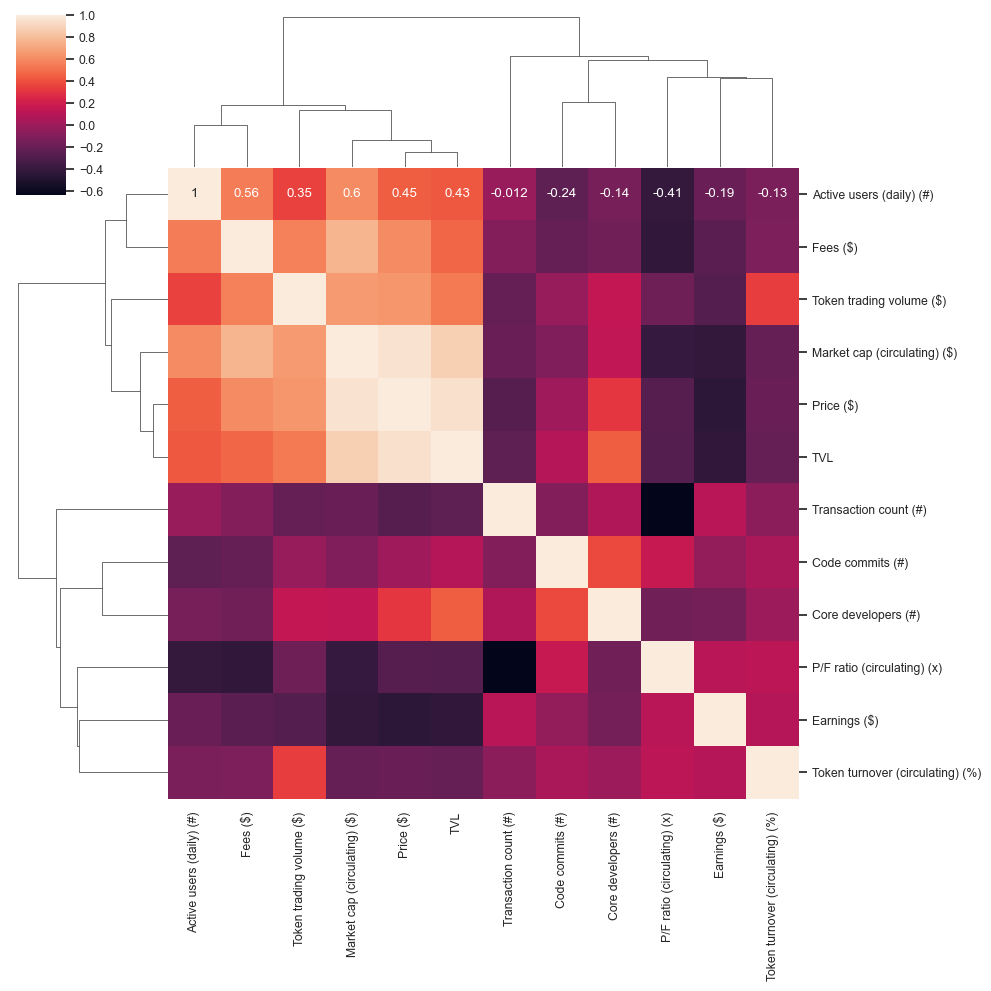

In [192]:
sns.clustermap(alldata.corr(), annot=True)
sns.set(font_scale=0.5) 

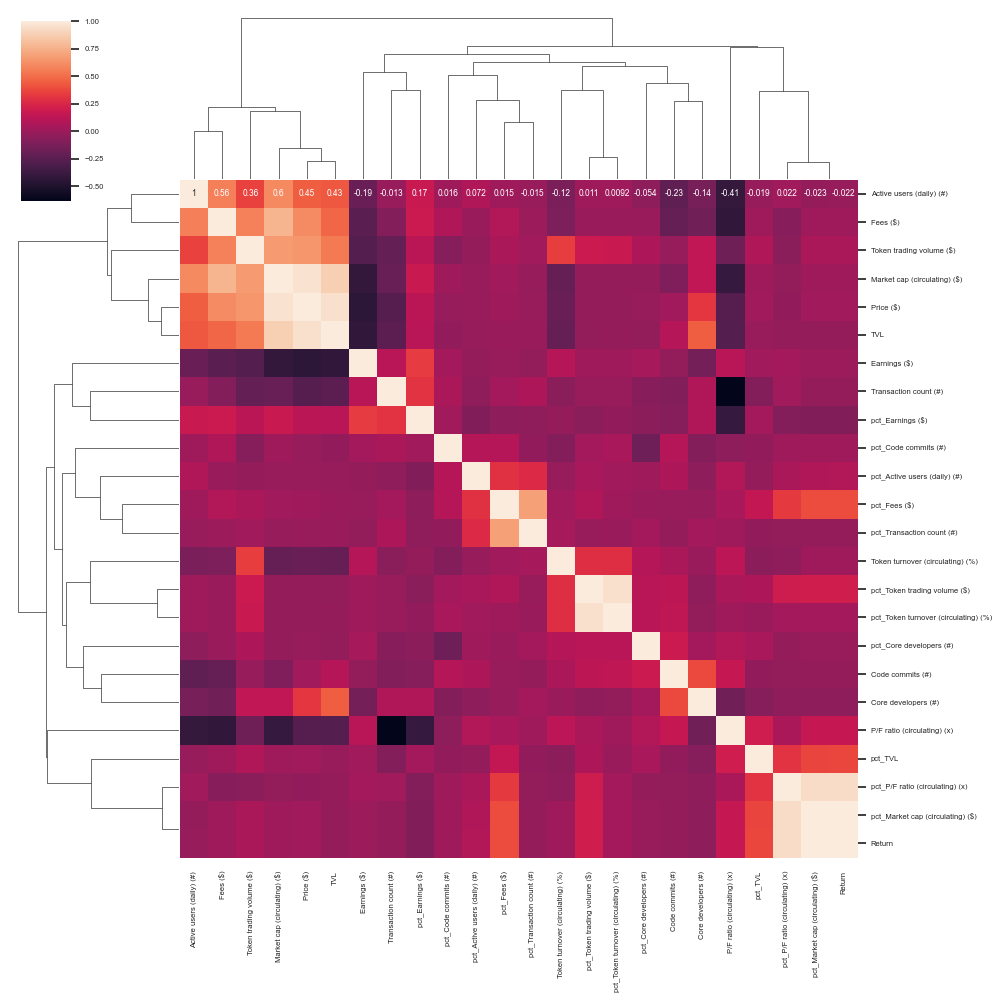

In [193]:
sns.clustermap(new_dataframe.corr(), annot=True)
sns.set(font_scale=0.8) 

In [194]:
Q1 = new_dataframe['Return'].quantile(0.25)
Q3 = new_dataframe['Return'].quantile(0.75)
IQR = Q3 - Q1

multiplier = 1
lower_bound = Q1 - multiplier * IQR
upper_bound = Q3 + multiplier * IQR

filtered_new_dataframe= new_dataframe[(new_dataframe['Return'] >= lower_bound) & (new_dataframe['Return'] <= upper_bound)]

In [199]:
filtered_new_dataframe

,Active users (daily) (#),Code commits (#),Core developers (#),Earnings ($),Fees ($),Market cap (circulating) ($),P/F ratio (circulating) (x),Price ($),Token trading volume ($),Token turnover (circulating) (%),...,pct_Core developers (#),pct_Earnings ($),pct_Fees ($),pct_Market cap (circulating) ($),pct_P/F ratio (circulating) (x),pct_Token trading volume ($),pct_Token turnover (circulating) (%),pct_Transaction count (#),pct_TVL,Return
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-19,6078.0,65.0,44.0,2826.04,5652.07,3.818503e+09,1891.42,14.27,9.833702e+07,0.03,...,0.000000,0.016876,0.016874,0.001205,-0.007738,-0.167539,0.000000,0.011649,0.028294,-0.000700
2021-03-20,5856.0,18.0,42.0,-3013605.56,5481.05,3.784531e+09,1861.03,14.18,8.684253e+07,0.02,...,-0.045455,-1067.370455,-0.030258,-0.008897,-0.016067,-0.116889,-0.333333,-0.022909,-0.035987,-0.006307
2021-03-21,5647.0,3.0,39.0,2638.64,5277.28,3.827195e+09,1879.00,14.28,8.634340e+07,0.02,...,-0.071429,-1.000876,-0.037177,0.011273,0.009656,-0.005748,0.000000,-0.043688,0.028738,0.007052
2021-03-22,6769.0,36.0,38.0,2738.88,5477.75,3.820744e+09,1889.66,14.31,7.948416e+07,0.02,...,-0.025641,0.037989,0.037987,-0.001686,0.005673,-0.079441,0.000000,0.033378,0.006883,0.002101
2021-03-23,7329.0,23.0,38.0,-3158253.58,5704.45,3.996884e+09,1976.40,14.87,3.265923e+08,0.08,...,0.000000,-1154.118640,0.041386,0.046101,0.045902,3.108898,3.000000,0.015924,0.059382,0.039133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-19,2825373.0,2.0,70.0,-21130938.22,679803.87,6.240327e+10,276.02,133.61,2.755310e+09,0.04,...,-0.014085,-72.712138,0.153526,0.013072,0.014705,0.281213,0.333333,-0.015067,0.061440,0.015891
2024-09-20,3678910.0,1.0,65.0,312677.50,625354.99,6.680835e+10,296.61,142.69,3.564422e+09,0.05,...,-0.071429,-1.014797,-0.080095,0.070590,0.074596,0.293656,0.250000,0.030179,0.078634,0.067959
2024-09-21,2880325.0,0.0,64.0,-23217561.64,611835.44,6.863837e+10,305.61,146.48,3.882734e+09,0.06,...,-0.015385,-75.254021,-0.021619,0.027392,0.030343,0.089302,0.200000,0.008491,-0.020515,0.026561


In [202]:
filtered_new_dataframe.columns

Index(['Active users (daily) (#)', 'Code commits (#)', 'Core developers (#)',
       'Earnings ($)', 'Fees ($)', 'Market cap (circulating) ($)',
       'P/F ratio (circulating) (x)', 'Price ($)', 'Token trading volume ($)',
       'Token turnover (circulating) (%)', 'Transaction count (#)', 'TVL',
       'pct_Active users (daily) (#)', 'pct_Code commits (#)',
       'pct_Core developers (#)', 'pct_Earnings ($)', 'pct_Fees ($)',
       'pct_Market cap (circulating) ($)', 'pct_P/F ratio (circulating) (x)',
       'pct_Token trading volume ($)', 'pct_Token turnover (circulating) (%)',
       'pct_Transaction count (#)', 'pct_TVL', 'Return'],
      dtype='object')

In [238]:
#VECM
selected = ['Active users (daily) (#)', 'Code commits (#)', 'Core developers (#)',
       'Earnings ($)', 'Fees ($)', 'Market cap (circulating) ($)',
       'P/F ratio (circulating) (x)', 'Price ($)', 'Token trading volume ($)',
       'Token turnover (circulating) (%)', 'Transaction count (#)', 'TVL']

In [223]:
for col in selected:
    print(col)
    print(ADF(filtered_new_dataframe[col], max_lags=10).summary())
    print("\n")

Active users (daily) (#)
   Augmented Dickey-Fuller Results   
Test Statistic                  0.099
P-value                         0.966
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


Code commits (#)
   Augmented Dickey-Fuller Results   
Test Statistic                 -4.930
P-value                         0.000
Lags                                6
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


Core developers (#)
   Augmented Dickey-Fuller Results   
Test Statistic                 -2.742
P-value                         0.067
Lags                               10
-------------------------------------

Trend

In [225]:
for col in selected:
    print(col)
    print(KPSS(filtered_new_dataframe[col],lags=10).summary())
    print("\n")

Active users (daily) (#)
    KPSS Stationarity Test Results   
Test Statistic                  3.892
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


Code commits (#)
    KPSS Stationarity Test Results   
Test Statistic                  5.219
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


Core developers (#)
    KPSS Stationarity Test Results   
Test Statistic                  2.220
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Cons

In [226]:
for col in selected:
    print(col)
    print(PhillipsPerron(filtered_new_dataframe[col],lags=10).summary())
    print("\n")

Active users (daily) (#)
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.460
P-value                         0.553
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


Code commits (#)
     Phillips-Perron Test (Z-tau)    
Test Statistic                -20.971
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


Core developers (#)
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.507
P-value                         0.114
Lags                               10
-------------------------------------

Trend

In [241]:
# Let's difference the non-stationary variables (those with unit roots) and check their stationarity.
# We will focus on the following columns: 'Active users (daily) (#)', 'Price ($)', 'Market cap (circulating) ($)', 
# 'Transaction count (#)', and 'TVL' as they exhibited unit roots in the tests.

# Differencing the variables
diff_data = filtered_new_dataframe[['Active users (daily) (#)', 'Price ($)', 'Market cap (circulating) ($)', 
                                    'Transaction count (#)', 'TVL']].diff().dropna()

# Perform ADF test again on the differenced data to check stationarity
from statsmodels.tsa.stattools import adfuller

adf_results = {}
for col in diff_data.columns:
    adf_result = adfuller(diff_data[col])
    adf_results[col] = {
        'ADF Statistic': adf_result[0],
        'p-value': adf_result[1],
        'Critical Values': adf_result[4]
    }

adf_results_df = pd.DataFrame(adf_results).T
adf_results_df 

,ADF Statistic,p-value,Critical Values
Active users (daily) (#),-10.780755,0.0,"{'1%': -3.4360991979671205, '5%': -2.864078635..."
Price ($),-21.719489,0.0,"{'1%': -3.43599497601695, '5%': -2.86403265853..."
Market cap (circulating) ($),-22.493724,0.0,"{'1%': -3.43599497601695, '5%': -2.86403265853..."
Transaction count (#),-13.345447,0.0,"{'1%': -3.436044130146462, '5%': -2.8640543429..."
TVL,-6.727185,0.0,"{'1%': -3.4360840741163168, '5%': -2.864071964..."


In [ ]:
# Variables with Unit Roots (non-stationary): Active users (daily), Price, Market cap (circulating), Transaction count, TVL

# Controversial Variables (mixed results): Core developers, Earnings, Fees, P/F ratio (circulating)

# Stationary Variables: Code commits, Token trading volume, Token turnover (circulating)

In [233]:
vecm_cols = ['Active users (daily) (#)', 'Price ($)', 'Market cap (circulating) ($)', 'Transaction count (#)', 'TVL']
order = vecm.select_order(alldata[vecm_cols],maxlags=7) 
print(order.summary())

 VECM Order Selection (* highlights the minimums)
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0       138.5       138.6   1.407e+60       138.5
1       138.1       138.4   9.849e+59       138.2
2       138.0      138.3*   8.220e+59      138.1*
3       138.0       138.4   8.190e+59       138.1
4       137.9       138.5   8.025e+59       138.1
5       137.9       138.5   7.903e+59       138.2
6       137.9       138.6   7.677e+59       138.2
7      137.9*       138.7  7.652e+59*       138.2
-------------------------------------------------


C:\Users\HHGiang\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HHGiang\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HHGiang\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HHGiang\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HHGiang\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be use

In [235]:
from statsmodels.tsa.vector_ar.vecm import select_coint_rank

# Select the cointegration rank using the maximum eigenvalue method with a significance level of 10%
rank = select_coint_rank(alldata[vecm_cols], det_order=1, k_ar_diff=7, method='maxeig', signif=0.1)

# Print the summary of the Johansen cointegration test results
print(rank.summary())


Johansen cointegration test using maximum eigenvalue test statistic with 10% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   1          49.69          34.42
  1   2          28.21          28.24
-------------------------------------


In [236]:
from statsmodels.tsa.vector_ar.vecm import select_coint_rank

# Select the cointegration rank using the maximum eigenvalue method with a significance level of 10%
rank = select_coint_rank(alldata[vecm_cols], det_order=1, k_ar_diff=7, method='trace', signif=0.1)

# Print the summary of the Johansen cointegration test results
print(rank.summary())


Johansen cointegration test using trace test statistic with 10% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   5          91.26          75.10
  1   5          41.56          51.65
-------------------------------------


In [237]:
from statsmodels.tsa.vector_ar.vecm import VECM

# Fit the VECM model with 7 lags and 1 cointegrating vector
vecm_model = VECM(alldata[vecm_cols], k_ar_diff=7, coint_rank=1)
vecm_fit = vecm_model.fit()

# Print VECM results
print(vecm_fit.summary())

Det. terms outside the coint. relation & lagged endog. parameters for equation Active users (daily) (#)
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
L1.Active users (daily) (#)        -0.4779      0.028    -17.032      0.000      -0.533      -0.423
L1.Price ($)                    -1.154e+04   3179.025     -3.631      0.000   -1.78e+04   -5312.969
L1.Market cap (circulating) ($)  3.734e-05   8.72e-06      4.285      0.000    2.03e-05    5.44e-05
L1.Transaction count (#)        -7.727e-05      0.000     -0.434      0.664      -0.000       0.000
L1.TVL                           5.533e-06   1.66e-05      0.333      0.739   -2.71e-05    3.81e-05
L2.Active users (daily) (#)        -0.3982      0.031    -12.939      0.000      -0.458      -0.338
L2.Price ($)                    -1336.3448   3233.137     -0.413      0.679   -7673.177    5000.

C:\Users\HHGiang\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
# Active users (daily) is significantly affected by its own past values and by Price and Market cap.
# Price is influenced by Transaction count and TVL in the short run.
# Market cap (circulating) is significantly impacted by Transaction count and TVL.
# TVL plays a critical role in adjusting to deviations from the long-run relationship, as indicated by the large and significant loading coefficient.
# Cointegration relation: Price and TVL are the primary contributors to the long-run equilibrium relationship.